In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [2]:
# % alpha = 0.00001; w_thresh = 20; leak = 0.2; fire_thresh = 10; wu_thresh =
# % 100; achieved max 72% accuracy
# % alpha = 0.00001; w_thresh = 20; leak = 0.5; fire_thresh = 10; wu_thresh =
# % 100; got 76% accuracy

# clc
# close all
# clear all

# load("train_data_015.mat");
#  W1 = rand(784,3);
# j = 1;
# A = zeros(12665,3);
# count_zero =0;
# ep = 1000;

# % hyperparameters
# alpha = 0.00001;
# w_thresh = 20;     % if weight>w_thresh, weight = w_thresh
# leak = 0.5;        % leaking in neuron   % 0.2
# fire_thresh = 10;   % if the output from the neuron is greater than fire_threshold, it fires
# wu_thresh = 100;   % if output from the neuron > wu_thresh, weight is updated

# %parameter
# % W1 = (w_thresh-0).*rand(784,3) + 0;

# for k = 1:ep
#     EPC=['Epoch#',num2str(k)];
#     disp(EPC);
    
#     acc = 0;    % counts accuracy in each epoch

# for i = 1:100         % 10 training examples taken

#     % input x weight
#     AA = train_data_015(i,2:785);
#     A_m = AA * W1;

#     A(i,1) = A(i,1) + A_m(1,1);      % A is neuron output
#     A(i,2) = A(i,2) + A_m(1,2);
#     A(i,3) = A(i,3) + A_m(1,3);


# if A(i,1)>wu_thresh                  % if output from the neuron > wu_thresh, weight is updated
#     for kk = 1:784
#          W1(kk,1) = W1(kk,1) + alpha.*A(i,1);
#     end
# else
#      for kk = 1:784
#          W1(kk,1) = W1(kk,1) - alpha.*A(i,1);
#      end
# end

# if A(i,2)>wu_thresh                % if output from the neuron > wu_thresh, weight is updated
# for kk=1:784
#     W1(kk,2) = W1(kk,2) + alpha.*A(i,2);
# end
# else
#     for kk=1:784
#        W1(kk,2) = W1(kk,2) - alpha.*A(i,2);
#     end
# end

# if A(i,3)>wu_thresh              % if output from the neuron > wu_thresh, weight is updated
# for kk=1:784
#     W1(kk,3) = W1(kk,3) + alpha.*A(i,3);
# end
# else
#     for kk=1:784
#     W1(kk,3) = W1(kk,3) - alpha.*A(i,3);
#     end
# end


#  for j=1:784
#      for nn=1:3
#          if W1(j,nn)>w_thresh        % if weight>w_thresh, weight = w_thresh
#              W1(j,nn) = w_thresh;
#          end
#          if W1(j,nn)<0
#              W1(j,nn) = 0;
#          end
#      end
#  end
 

# for j = 1:3
# if A(i,j)>=fire_thresh         % if the output from the neuron is greater than fire_threshold, it fires
#     A(i,:) = 0;
# else
#     A(i,j) = A(i,j) - leak;
# end
# end

# [val,predict(i)] = max(A(i,:));  % predict among three output neurons, which one has maximum value

# if predict(i) == 1          % if 1st output neuron is maximum, it is predicted as 0
#     predict(i) = 0;
# elseif predict(i) == 2      % if 2nd output neuron is maximum, it is predicted as 1
#     predict(i) = 1;
# else
#     predict(i) = 5;          % if 3rd output neuron is maximum, it is predicted as 5
# end

#  predict_store(i,1) = predict(i);


# if (predict_store(i,1))==train_data_015(i,1)  % if predicted value matches with original value, increase acc
#     acc = (acc + 1);
# end

# end
# acc_plot(k) = (acc/100)*100;       % calculate accuracy in percentage

# count_correct = 0;                % counts how many digits are predicted correctly

# for i = 1:100
#     comp(i,1) = train_data_015(i,1);  % 1st column of comp has the original digits 
#     comp(i,2) = predict_store(i,1);   % 2nd column of comp has the predicted digits 

#     if comp(i,1) == comp(i,2)    % if predicted and original match, increase the count of correct digit
#             count_correct = count_correct + 1;  
#     end
# end

#     count_correct_store(k,1) = count_correct; % holds the #correct digit in each epoch

#     if acc_plot(k) >= 70    % if the accuracy>=70, save the predicted and original digits separately
#         comp_s = comp;
#     end

# end
# figure(1)
# plot(1:k,acc_plot,"b-o")

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [5]:
# train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 5))
# test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 5))

In [6]:
X_train = X_train/255.0

In [7]:
train_filter_0 = np.where(Y_train == 0)
test_filter_0 = np.where(Y_test == 0)

X_train_filter_0 , Y_train_filter_0 = X_train[train_filter_0],Y_train[train_filter_0]
X_test_filter_0 , Y_test_filter_0 = X_test[test_filter_0] , Y_test[test_filter_0]

In [8]:
train_filter_1 = np.where(Y_train == 1)
test_filter_1 = np.where(Y_test == 1)

X_train_filter_1 , Y_train_filter_1 = X_train[train_filter_1],Y_train[train_filter_1]
X_test_filter_1 , Y_test_filter_1 = X_test[test_filter_1] , Y_test[test_filter_1]

In [9]:
train_filter_5 = np.where(Y_train == 5)
test_filter_5 = np.where(Y_test == 5)

X_train_filter_5 , Y_train_filter_5 = X_train[train_filter_5],Y_train[train_filter_5]
X_test_filter_5 , Y_test_filter_5 = X_test[test_filter_5] , Y_test[test_filter_5]

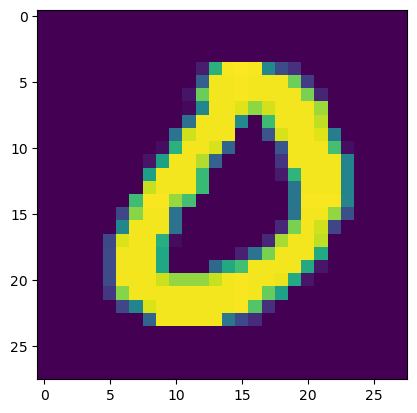

In [10]:
plt.imshow(X_train_filter_0[34])

In [11]:
flattenImage = []
Y_train_filter = []

for image_ in X_train_filter_0[:34]:
    image_ = image_.flatten()
    flattenImage.append(image_)
    Y_train_filter.append(0)

for image_ in X_train_filter_1[:33]:
    image_ = image_.flatten()
    flattenImage.append(image_)
    Y_train_filter.append(1)

for image_ in X_train_filter_5[:33]:
    image_ = image_.flatten()
    flattenImage.append(image_)
    Y_train_filter.append(5)

In [12]:
flattenImage, Y_train_filter = shuffle(flattenImage, Y_train_filter, random_state=0)

In [13]:
len(flattenImage)

100

Epoch# 1
34
Epoch# 2
34
Epoch# 3
34
Epoch# 4
34
Epoch# 5
34
Epoch# 6
34
Epoch# 7
34
Epoch# 8
34
Epoch# 9
34
Epoch# 10
34
Epoch# 11
34
Epoch# 12
34
Epoch# 13
34
Epoch# 14
34
Epoch# 15
34
Epoch# 16
34
Epoch# 17
36
Epoch# 18
37
Epoch# 19
37
Epoch# 20
43
Epoch# 21
38
Epoch# 22
47
Epoch# 23
38
Epoch# 24
49
Epoch# 25
39
Epoch# 26
46
Epoch# 27
40
Epoch# 28
46
Epoch# 29
38
Epoch# 30
46
Epoch# 31
36
Epoch# 32
50
Epoch# 33
34
Epoch# 34
46
Epoch# 35
41
Epoch# 36
38
Epoch# 37
39
Epoch# 38
39
Epoch# 39
40
Epoch# 40
35
Epoch# 41
38
Epoch# 42
40
Epoch# 43
38
Epoch# 44
32
Epoch# 45
43
Epoch# 46
36
Epoch# 47
48
Epoch# 48
39
Epoch# 49
45
Epoch# 50
40
Epoch# 51
42
Epoch# 52
50
Epoch# 53
40
Epoch# 54
40
Epoch# 55
42
Epoch# 56
45
Epoch# 57
46
Epoch# 58
40
Epoch# 59
45
Epoch# 60
46
Epoch# 61
50
Epoch# 62
46
Epoch# 63
41
Epoch# 64
40
Epoch# 65
38
Epoch# 66
44
Epoch# 67
43
Epoch# 68
44
Epoch# 69
42
Epoch# 70
39
Epoch# 71
42
Epoch# 72
38
Epoch# 73
42
Epoch# 74
39
Epoch# 75
42
Epoch# 76
37
Epoch# 77
38
Epoch# 7

39
Epoch# 639
37
Epoch# 640
37
Epoch# 641
37
Epoch# 642
36
Epoch# 643
34
Epoch# 644
36
Epoch# 645
38
Epoch# 646
41
Epoch# 647
36
Epoch# 648
38
Epoch# 649
36
Epoch# 650
37
Epoch# 651
38
Epoch# 652
37
Epoch# 653
39
Epoch# 654
42
Epoch# 655
40
Epoch# 656
34
Epoch# 657
35
Epoch# 658
36
Epoch# 659
45
Epoch# 660
35
Epoch# 661
40
Epoch# 662
37
Epoch# 663
35
Epoch# 664
35
Epoch# 665
37
Epoch# 666
41
Epoch# 667
37
Epoch# 668
33
Epoch# 669
41
Epoch# 670
39
Epoch# 671
38
Epoch# 672
33
Epoch# 673
40
Epoch# 674
36
Epoch# 675
40
Epoch# 676
38
Epoch# 677
37
Epoch# 678
36
Epoch# 679
37
Epoch# 680
38
Epoch# 681
38
Epoch# 682
39
Epoch# 683
41
Epoch# 684
42
Epoch# 685
35
Epoch# 686
37
Epoch# 687
40
Epoch# 688
40
Epoch# 689
39
Epoch# 690
39
Epoch# 691
37
Epoch# 692
37
Epoch# 693
39
Epoch# 694
42
Epoch# 695
39
Epoch# 696
44
Epoch# 697
37
Epoch# 698
38
Epoch# 699
37
Epoch# 700
39
Epoch# 701
38
Epoch# 702
42
Epoch# 703
39
Epoch# 704
41
Epoch# 705
42
Epoch# 706
39
Epoch# 707
39
Epoch# 708
41
Epoch# 709
37
Epo

41
Epoch# 1224
43
Epoch# 1225
43
Epoch# 1226
41
Epoch# 1227
43
Epoch# 1228
44
Epoch# 1229
46
Epoch# 1230
42
Epoch# 1231
44
Epoch# 1232
44
Epoch# 1233
47
Epoch# 1234
43
Epoch# 1235
42
Epoch# 1236
45
Epoch# 1237
45
Epoch# 1238
44
Epoch# 1239
44
Epoch# 1240
42
Epoch# 1241
46
Epoch# 1242
43
Epoch# 1243
40
Epoch# 1244
40
Epoch# 1245
39
Epoch# 1246
38
Epoch# 1247
44
Epoch# 1248
46
Epoch# 1249
40
Epoch# 1250
33
Epoch# 1251
36
Epoch# 1252
32
Epoch# 1253
38
Epoch# 1254
38
Epoch# 1255
37
Epoch# 1256
40
Epoch# 1257
40
Epoch# 1258
41
Epoch# 1259
43
Epoch# 1260
35
Epoch# 1261
34
Epoch# 1262
32
Epoch# 1263
39
Epoch# 1264
38
Epoch# 1265
38
Epoch# 1266
36
Epoch# 1267
34
Epoch# 1268
40
Epoch# 1269
37
Epoch# 1270
41
Epoch# 1271
41
Epoch# 1272
36
Epoch# 1273
37
Epoch# 1274
36
Epoch# 1275
40
Epoch# 1276
39
Epoch# 1277
39
Epoch# 1278
37
Epoch# 1279
41
Epoch# 1280
36
Epoch# 1281
36
Epoch# 1282
40
Epoch# 1283
35
Epoch# 1284
37
Epoch# 1285
38
Epoch# 1286
38
Epoch# 1287
38
Epoch# 1288
37
Epoch# 1289
38
Epoch# 

42
Epoch# 1817
39
Epoch# 1818
37
Epoch# 1819
40
Epoch# 1820
33
Epoch# 1821
39
Epoch# 1822
39
Epoch# 1823
41
Epoch# 1824
36
Epoch# 1825
37
Epoch# 1826
34
Epoch# 1827
35
Epoch# 1828
40
Epoch# 1829
39
Epoch# 1830
38
Epoch# 1831
39
Epoch# 1832
38
Epoch# 1833
41
Epoch# 1834
38
Epoch# 1835
39
Epoch# 1836
39
Epoch# 1837
38
Epoch# 1838
37
Epoch# 1839
37
Epoch# 1840
37
Epoch# 1841
38
Epoch# 1842
39
Epoch# 1843
39
Epoch# 1844
35
Epoch# 1845
41
Epoch# 1846
38
Epoch# 1847
36
Epoch# 1848
39
Epoch# 1849
33
Epoch# 1850
39
Epoch# 1851
40
Epoch# 1852
38
Epoch# 1853
38
Epoch# 1854
36
Epoch# 1855
34
Epoch# 1856
38
Epoch# 1857
39
Epoch# 1858
42
Epoch# 1859
44
Epoch# 1860
42
Epoch# 1861
39
Epoch# 1862
37
Epoch# 1863
41
Epoch# 1864
38
Epoch# 1865
37
Epoch# 1866
36
Epoch# 1867
42
Epoch# 1868
42
Epoch# 1869
38
Epoch# 1870
39
Epoch# 1871
39
Epoch# 1872
40
Epoch# 1873
42
Epoch# 1874
42
Epoch# 1875
36
Epoch# 1876
43
Epoch# 1877
42
Epoch# 1878
37
Epoch# 1879
39
Epoch# 1880
38
Epoch# 1881
39
Epoch# 1882
39
Epoch# 

42
Epoch# 2410
38
Epoch# 2411
39
Epoch# 2412
42
Epoch# 2413
45
Epoch# 2414
40
Epoch# 2415
40
Epoch# 2416
42
Epoch# 2417
39
Epoch# 2418
41
Epoch# 2419
45
Epoch# 2420
43
Epoch# 2421
44
Epoch# 2422
40
Epoch# 2423
44
Epoch# 2424
42
Epoch# 2425
43
Epoch# 2426
41
Epoch# 2427
45
Epoch# 2428
46
Epoch# 2429
38
Epoch# 2430
42
Epoch# 2431
41
Epoch# 2432
40
Epoch# 2433
41
Epoch# 2434
40
Epoch# 2435
43
Epoch# 2436
41
Epoch# 2437
49
Epoch# 2438
37
Epoch# 2439
40
Epoch# 2440
35
Epoch# 2441
37
Epoch# 2442
43
Epoch# 2443
43
Epoch# 2444
43
Epoch# 2445
38
Epoch# 2446
43
Epoch# 2447
39
Epoch# 2448
43
Epoch# 2449
42
Epoch# 2450
41
Epoch# 2451
41
Epoch# 2452
38
Epoch# 2453
41
Epoch# 2454
41
Epoch# 2455
42
Epoch# 2456
41
Epoch# 2457
39
Epoch# 2458
42
Epoch# 2459
45
Epoch# 2460
38
Epoch# 2461
42
Epoch# 2462
39
Epoch# 2463
40
Epoch# 2464
43
Epoch# 2465
41
Epoch# 2466
42
Epoch# 2467
43
Epoch# 2468
40
Epoch# 2469
41
Epoch# 2470
39
Epoch# 2471
36
Epoch# 2472
44
Epoch# 2473
41
Epoch# 2474
43
Epoch# 2475
41
Epoch# 

48
Epoch# 3003
40
Epoch# 3004
44
Epoch# 3005
48
Epoch# 3006
40
Epoch# 3007
46
Epoch# 3008
47
Epoch# 3009
41
Epoch# 3010
43
Epoch# 3011
42
Epoch# 3012
42
Epoch# 3013
47
Epoch# 3014
45
Epoch# 3015
46
Epoch# 3016
44
Epoch# 3017
42
Epoch# 3018
42
Epoch# 3019
46
Epoch# 3020
42
Epoch# 3021
47
Epoch# 3022
42
Epoch# 3023
40
Epoch# 3024
44
Epoch# 3025
46
Epoch# 3026
45
Epoch# 3027
43
Epoch# 3028
42
Epoch# 3029
45
Epoch# 3030
42
Epoch# 3031
46
Epoch# 3032
41
Epoch# 3033
45
Epoch# 3034
42
Epoch# 3035
46
Epoch# 3036
41
Epoch# 3037
37
Epoch# 3038
43
Epoch# 3039
42
Epoch# 3040
45
Epoch# 3041
44
Epoch# 3042
38
Epoch# 3043
39
Epoch# 3044
41
Epoch# 3045
45
Epoch# 3046
45
Epoch# 3047
43
Epoch# 3048
43
Epoch# 3049
41
Epoch# 3050
41
Epoch# 3051
48
Epoch# 3052
42
Epoch# 3053
42
Epoch# 3054
43
Epoch# 3055
45
Epoch# 3056
46
Epoch# 3057
43
Epoch# 3058
41
Epoch# 3059
44
Epoch# 3060
45
Epoch# 3061
48
Epoch# 3062
41
Epoch# 3063
44
Epoch# 3064
49
Epoch# 3065
43
Epoch# 3066
43
Epoch# 3067
42
Epoch# 3068
41
Epoch# 

46
Epoch# 3596
41
Epoch# 3597
45
Epoch# 3598
46
Epoch# 3599
42
Epoch# 3600
47
Epoch# 3601
43
Epoch# 3602
44
Epoch# 3603
45
Epoch# 3604
43
Epoch# 3605
43
Epoch# 3606
43
Epoch# 3607
44
Epoch# 3608
42
Epoch# 3609
38
Epoch# 3610
41
Epoch# 3611
41
Epoch# 3612
45
Epoch# 3613
42
Epoch# 3614
42
Epoch# 3615
45
Epoch# 3616
46
Epoch# 3617
45
Epoch# 3618
42
Epoch# 3619
43
Epoch# 3620
39
Epoch# 3621
44
Epoch# 3622
45
Epoch# 3623
40
Epoch# 3624
42
Epoch# 3625
45
Epoch# 3626
43
Epoch# 3627
42
Epoch# 3628
47
Epoch# 3629
44
Epoch# 3630
38
Epoch# 3631
43
Epoch# 3632
41
Epoch# 3633
39
Epoch# 3634
38
Epoch# 3635
38
Epoch# 3636
40
Epoch# 3637
39
Epoch# 3638
40
Epoch# 3639
41
Epoch# 3640
37
Epoch# 3641
37
Epoch# 3642
37
Epoch# 3643
41
Epoch# 3644
42
Epoch# 3645
42
Epoch# 3646
42
Epoch# 3647
43
Epoch# 3648
44
Epoch# 3649
40
Epoch# 3650
42
Epoch# 3651
44
Epoch# 3652
47
Epoch# 3653
42
Epoch# 3654
41
Epoch# 3655
43
Epoch# 3656
44
Epoch# 3657
46
Epoch# 3658
43
Epoch# 3659
41
Epoch# 3660
45
Epoch# 3661
41
Epoch# 

44
Epoch# 4189
41
Epoch# 4190
44
Epoch# 4191
42
Epoch# 4192
42
Epoch# 4193
38
Epoch# 4194
42
Epoch# 4195
39
Epoch# 4196
45
Epoch# 4197
39
Epoch# 4198
45
Epoch# 4199
39
Epoch# 4200
35
Epoch# 4201
44
Epoch# 4202
44
Epoch# 4203
39
Epoch# 4204
41
Epoch# 4205
37
Epoch# 4206
46
Epoch# 4207
41
Epoch# 4208
44
Epoch# 4209
37
Epoch# 4210
43
Epoch# 4211
41
Epoch# 4212
41
Epoch# 4213
40
Epoch# 4214
44
Epoch# 4215
41
Epoch# 4216
43
Epoch# 4217
38
Epoch# 4218
41
Epoch# 4219
37
Epoch# 4220
46
Epoch# 4221
42
Epoch# 4222
45
Epoch# 4223
39
Epoch# 4224
41
Epoch# 4225
39
Epoch# 4226
40
Epoch# 4227
40
Epoch# 4228
40
Epoch# 4229
38
Epoch# 4230
39
Epoch# 4231
39
Epoch# 4232
44
Epoch# 4233
42
Epoch# 4234
39
Epoch# 4235
37
Epoch# 4236
45
Epoch# 4237
41
Epoch# 4238
44
Epoch# 4239
40
Epoch# 4240
39
Epoch# 4241
39
Epoch# 4242
40
Epoch# 4243
39
Epoch# 4244
41
Epoch# 4245
41
Epoch# 4246
43
Epoch# 4247
35
Epoch# 4248
41
Epoch# 4249
40
Epoch# 4250
44
Epoch# 4251
40
Epoch# 4252
37
Epoch# 4253
39
Epoch# 4254
45
Epoch# 

36
Epoch# 4783
41
Epoch# 4784
46
Epoch# 4785
40
Epoch# 4786
43
Epoch# 4787
34
Epoch# 4788
42
Epoch# 4789
34
Epoch# 4790
43
Epoch# 4791
42
Epoch# 4792
41
Epoch# 4793
37
Epoch# 4794
38
Epoch# 4795
39
Epoch# 4796
39
Epoch# 4797
36
Epoch# 4798
39
Epoch# 4799
39
Epoch# 4800
47
Epoch# 4801
43
Epoch# 4802
38
Epoch# 4803
37
Epoch# 4804
44
Epoch# 4805
38
Epoch# 4806
41
Epoch# 4807
37
Epoch# 4808
43
Epoch# 4809
40
Epoch# 4810
40
Epoch# 4811
41
Epoch# 4812
43
Epoch# 4813
41
Epoch# 4814
38
Epoch# 4815
43
Epoch# 4816
42
Epoch# 4817
37
Epoch# 4818
37
Epoch# 4819
40
Epoch# 4820
40
Epoch# 4821
40
Epoch# 4822
41
Epoch# 4823
39
Epoch# 4824
36
Epoch# 4825
43
Epoch# 4826
44
Epoch# 4827
41
Epoch# 4828
42
Epoch# 4829
38
Epoch# 4830
38
Epoch# 4831
36
Epoch# 4832
41
Epoch# 4833
42
Epoch# 4834
42
Epoch# 4835
42
Epoch# 4836
39
Epoch# 4837
42
Epoch# 4838
43
Epoch# 4839
38
Epoch# 4840
41
Epoch# 4841
36
Epoch# 4842
39
Epoch# 4843
43
Epoch# 4844
45
Epoch# 4845
42
Epoch# 4846
38
Epoch# 4847
38
Epoch# 4848
40
Epoch# 

35
Epoch# 5376
34
Epoch# 5377
44
Epoch# 5378
37
Epoch# 5379
35
Epoch# 5380
31
Epoch# 5381
34
Epoch# 5382
41
Epoch# 5383
36
Epoch# 5384
37
Epoch# 5385
38
Epoch# 5386
37
Epoch# 5387
38
Epoch# 5388
29
Epoch# 5389
41
Epoch# 5390
35
Epoch# 5391
34
Epoch# 5392
35
Epoch# 5393
37
Epoch# 5394
41
Epoch# 5395
35
Epoch# 5396
36
Epoch# 5397
36
Epoch# 5398
39
Epoch# 5399
35
Epoch# 5400
36
Epoch# 5401
37
Epoch# 5402
31
Epoch# 5403
34
Epoch# 5404
38
Epoch# 5405
42
Epoch# 5406
37
Epoch# 5407
36
Epoch# 5408
34
Epoch# 5409
36
Epoch# 5410
40
Epoch# 5411
33
Epoch# 5412
36
Epoch# 5413
38
Epoch# 5414
39
Epoch# 5415
34
Epoch# 5416
31
Epoch# 5417
39
Epoch# 5418
38
Epoch# 5419
35
Epoch# 5420
39
Epoch# 5421
35
Epoch# 5422
39
Epoch# 5423
32
Epoch# 5424
37
Epoch# 5425
41
Epoch# 5426
38
Epoch# 5427
32
Epoch# 5428
33
Epoch# 5429
40
Epoch# 5430
41
Epoch# 5431
32
Epoch# 5432
36
Epoch# 5433
36
Epoch# 5434
35
Epoch# 5435
37
Epoch# 5436
37
Epoch# 5437
39
Epoch# 5438
35
Epoch# 5439
33
Epoch# 5440
37
Epoch# 5441
34
Epoch# 

41
Epoch# 5969
35
Epoch# 5970
33
Epoch# 5971
38
Epoch# 5972
36
Epoch# 5973
39
Epoch# 5974
33
Epoch# 5975
31
Epoch# 5976
40
Epoch# 5977
39
Epoch# 5978
42
Epoch# 5979
33
Epoch# 5980
34
Epoch# 5981
38
Epoch# 5982
37
Epoch# 5983
39
Epoch# 5984
34
Epoch# 5985
36
Epoch# 5986
36
Epoch# 5987
38
Epoch# 5988
36
Epoch# 5989
35
Epoch# 5990
42
Epoch# 5991
34
Epoch# 5992
36
Epoch# 5993
37
Epoch# 5994
37
Epoch# 5995
32
Epoch# 5996
38
Epoch# 5997
40
Epoch# 5998
37
Epoch# 5999
35
Epoch# 6000
34
Epoch# 6001
35
Epoch# 6002
39
Epoch# 6003
38
Epoch# 6004
35
Epoch# 6005
36
Epoch# 6006
39
Epoch# 6007
35
Epoch# 6008
40
Epoch# 6009
33
Epoch# 6010
34
Epoch# 6011
40
Epoch# 6012
40
Epoch# 6013
38
Epoch# 6014
35
Epoch# 6015
33
Epoch# 6016
35
Epoch# 6017
36
Epoch# 6018
40
Epoch# 6019
34
Epoch# 6020
33
Epoch# 6021
39
Epoch# 6022
37
Epoch# 6023
40
Epoch# 6024
36
Epoch# 6025
33
Epoch# 6026
37
Epoch# 6027
36
Epoch# 6028
38
Epoch# 6029
36
Epoch# 6030
35
Epoch# 6031
40
Epoch# 6032
35
Epoch# 6033
39
Epoch# 6034
35
Epoch# 

33
Epoch# 6563
35
Epoch# 6564
37
Epoch# 6565
37
Epoch# 6566
34
Epoch# 6567
42
Epoch# 6568
34
Epoch# 6569
33
Epoch# 6570
37
Epoch# 6571
36
Epoch# 6572
40
Epoch# 6573
41
Epoch# 6574
31
Epoch# 6575
34
Epoch# 6576
38
Epoch# 6577
35
Epoch# 6578
35
Epoch# 6579
37
Epoch# 6580
36
Epoch# 6581
42
Epoch# 6582
35
Epoch# 6583
34
Epoch# 6584
36
Epoch# 6585
42
Epoch# 6586
34
Epoch# 6587
38
Epoch# 6588
35
Epoch# 6589
37
Epoch# 6590
35
Epoch# 6591
35
Epoch# 6592
40
Epoch# 6593
32
Epoch# 6594
36
Epoch# 6595
35
Epoch# 6596
38
Epoch# 6597
40
Epoch# 6598
40
Epoch# 6599
32
Epoch# 6600
37
Epoch# 6601
33
Epoch# 6602
40
Epoch# 6603
34
Epoch# 6604
39
Epoch# 6605
34
Epoch# 6606
40
Epoch# 6607
37
Epoch# 6608
34
Epoch# 6609
38
Epoch# 6610
42
Epoch# 6611
30
Epoch# 6612
38
Epoch# 6613
38
Epoch# 6614
32
Epoch# 6615
37
Epoch# 6616
38
Epoch# 6617
37
Epoch# 6618
33
Epoch# 6619
37
Epoch# 6620
38
Epoch# 6621
34
Epoch# 6622
38
Epoch# 6623
34
Epoch# 6624
36
Epoch# 6625
40
Epoch# 6626
38
Epoch# 6627
37
Epoch# 6628
39
Epoch# 

37
Epoch# 7157
38
Epoch# 7158
34
Epoch# 7159
31
Epoch# 7160
42
Epoch# 7161
36
Epoch# 7162
39
Epoch# 7163
36
Epoch# 7164
37
Epoch# 7165
34
Epoch# 7166
35
Epoch# 7167
37
Epoch# 7168
45
Epoch# 7169
35
Epoch# 7170
34
Epoch# 7171
35
Epoch# 7172
39
Epoch# 7173
37
Epoch# 7174
30
Epoch# 7175
31
Epoch# 7176
44
Epoch# 7177
38
Epoch# 7178
35
Epoch# 7179
35
Epoch# 7180
39
Epoch# 7181
41
Epoch# 7182
31
Epoch# 7183
34
Epoch# 7184
38
Epoch# 7185
39
Epoch# 7186
40
Epoch# 7187
30
Epoch# 7188
40
Epoch# 7189
34
Epoch# 7190
34
Epoch# 7191
37
Epoch# 7192
42
Epoch# 7193
40
Epoch# 7194
33
Epoch# 7195
33
Epoch# 7196
37
Epoch# 7197
39
Epoch# 7198
36
Epoch# 7199
32
Epoch# 7200
36
Epoch# 7201
39
Epoch# 7202
34
Epoch# 7203
37
Epoch# 7204
38
Epoch# 7205
39
Epoch# 7206
35
Epoch# 7207
33
Epoch# 7208
39
Epoch# 7209
40
Epoch# 7210
34
Epoch# 7211
36
Epoch# 7212
41
Epoch# 7213
36
Epoch# 7214
31
Epoch# 7215
34
Epoch# 7216
40
Epoch# 7217
37
Epoch# 7218
36
Epoch# 7219
32
Epoch# 7220
41
Epoch# 7221
40
Epoch# 7222
35
Epoch# 

36
Epoch# 7750
31
Epoch# 7751
39
Epoch# 7752
36
Epoch# 7753
35
Epoch# 7754
37
Epoch# 7755
35
Epoch# 7756
39
Epoch# 7757
39
Epoch# 7758
34
Epoch# 7759
34
Epoch# 7760
34
Epoch# 7761
43
Epoch# 7762
41
Epoch# 7763
35
Epoch# 7764
34
Epoch# 7765
36
Epoch# 7766
36
Epoch# 7767
33
Epoch# 7768
37
Epoch# 7769
38
Epoch# 7770
39
Epoch# 7771
36
Epoch# 7772
36
Epoch# 7773
36
Epoch# 7774
35
Epoch# 7775
32
Epoch# 7776
40
Epoch# 7777
41
Epoch# 7778
32
Epoch# 7779
36
Epoch# 7780
39
Epoch# 7781
33
Epoch# 7782
38
Epoch# 7783
36
Epoch# 7784
40
Epoch# 7785
33
Epoch# 7786
41
Epoch# 7787
36
Epoch# 7788
36
Epoch# 7789
39
Epoch# 7790
35
Epoch# 7791
31
Epoch# 7792
39
Epoch# 7793
38
Epoch# 7794
38
Epoch# 7795
33
Epoch# 7796
37
Epoch# 7797
37
Epoch# 7798
36
Epoch# 7799
34
Epoch# 7800
34
Epoch# 7801
39
Epoch# 7802
41
Epoch# 7803
37
Epoch# 7804
34
Epoch# 7805
36
Epoch# 7806
34
Epoch# 7807
37
Epoch# 7808
36
Epoch# 7809
40
Epoch# 7810
38
Epoch# 7811
38
Epoch# 7812
34
Epoch# 7813
42
Epoch# 7814
33
Epoch# 7815
29
Epoch# 

39
Epoch# 8344
36
Epoch# 8345
37
Epoch# 8346
39
Epoch# 8347
32
Epoch# 8348
40
Epoch# 8349
35
Epoch# 8350
30
Epoch# 8351
34
Epoch# 8352
40
Epoch# 8353
47
Epoch# 8354
34
Epoch# 8355
32
Epoch# 8356
33
Epoch# 8357
42
Epoch# 8358
35
Epoch# 8359
37
Epoch# 8360
32
Epoch# 8361
41
Epoch# 8362
35
Epoch# 8363
34
Epoch# 8364
39
Epoch# 8365
40
Epoch# 8366
37
Epoch# 8367
33
Epoch# 8368
39
Epoch# 8369
39
Epoch# 8370
35
Epoch# 8371
31
Epoch# 8372
36
Epoch# 8373
43
Epoch# 8374
34
Epoch# 8375
35
Epoch# 8376
37
Epoch# 8377
39
Epoch# 8378
38
Epoch# 8379
32
Epoch# 8380
35
Epoch# 8381
41
Epoch# 8382
37
Epoch# 8383
33
Epoch# 8384
38
Epoch# 8385
36
Epoch# 8386
37
Epoch# 8387
33
Epoch# 8388
39
Epoch# 8389
37
Epoch# 8390
37
Epoch# 8391
39
Epoch# 8392
37
Epoch# 8393
33
Epoch# 8394
29
Epoch# 8395
38
Epoch# 8396
42
Epoch# 8397
39
Epoch# 8398
35
Epoch# 8399
35
Epoch# 8400
35
Epoch# 8401
34
Epoch# 8402
43
Epoch# 8403
35
Epoch# 8404
33
Epoch# 8405
36
Epoch# 8406
37
Epoch# 8407
35
Epoch# 8408
41
Epoch# 8409
38
Epoch# 

40
Epoch# 8936
40
Epoch# 8937
30
Epoch# 8938
37
Epoch# 8939
36
Epoch# 8940
39
Epoch# 8941
37
Epoch# 8942
36
Epoch# 8943
38
Epoch# 8944
37
Epoch# 8945
33
Epoch# 8946
36
Epoch# 8947
36
Epoch# 8948
36
Epoch# 8949
39
Epoch# 8950
37
Epoch# 8951
35
Epoch# 8952
36
Epoch# 8953
38
Epoch# 8954
35
Epoch# 8955
36
Epoch# 8956
41
Epoch# 8957
32
Epoch# 8958
37
Epoch# 8959
37
Epoch# 8960
35
Epoch# 8961
36
Epoch# 8962
37
Epoch# 8963
39
Epoch# 8964
39
Epoch# 8965
36
Epoch# 8966
35
Epoch# 8967
35
Epoch# 8968
40
Epoch# 8969
31
Epoch# 8970
39
Epoch# 8971
32
Epoch# 8972
36
Epoch# 8973
36
Epoch# 8974
42
Epoch# 8975
36
Epoch# 8976
41
Epoch# 8977
33
Epoch# 8978
37
Epoch# 8979
34
Epoch# 8980
40
Epoch# 8981
38
Epoch# 8982
33
Epoch# 8983
36
Epoch# 8984
32
Epoch# 8985
37
Epoch# 8986
38
Epoch# 8987
34
Epoch# 8988
38
Epoch# 8989
42
Epoch# 8990
38
Epoch# 8991
31
Epoch# 8992
37
Epoch# 8993
34
Epoch# 8994
36
Epoch# 8995
37
Epoch# 8996
35
Epoch# 8997
36
Epoch# 8998
34
Epoch# 8999
37
Epoch# 9000
38
Epoch# 9001
39
Epoch# 

37
Epoch# 9520
42
Epoch# 9521
35
Epoch# 9522
36
Epoch# 9523
36
Epoch# 9524
34
Epoch# 9525
44
Epoch# 9526
35
Epoch# 9527
30
Epoch# 9528
37
Epoch# 9529
39
Epoch# 9530
38
Epoch# 9531
34
Epoch# 9532
38
Epoch# 9533
37
Epoch# 9534
32
Epoch# 9535
39
Epoch# 9536
35
Epoch# 9537
35
Epoch# 9538
35
Epoch# 9539
38
Epoch# 9540
41
Epoch# 9541
35
Epoch# 9542
36
Epoch# 9543
34
Epoch# 9544
35
Epoch# 9545
42
Epoch# 9546
31
Epoch# 9547
37
Epoch# 9548
33
Epoch# 9549
39
Epoch# 9550
37
Epoch# 9551
32
Epoch# 9552
34
Epoch# 9553
40
Epoch# 9554
36
Epoch# 9555
35
Epoch# 9556
34
Epoch# 9557
36
Epoch# 9558
40
Epoch# 9559
28
Epoch# 9560
39
Epoch# 9561
33
Epoch# 9562
31
Epoch# 9563
38
Epoch# 9564
33
Epoch# 9565
46
Epoch# 9566
36
Epoch# 9567
36
Epoch# 9568
28
Epoch# 9569
32
Epoch# 9570
39
Epoch# 9571
38
Epoch# 9572
40
Epoch# 9573
35
Epoch# 9574
35
Epoch# 9575
35
Epoch# 9576
33
Epoch# 9577
37
Epoch# 9578
42
Epoch# 9579
41
Epoch# 9580
36
Epoch# 9581
36
Epoch# 9582
38
Epoch# 9583
39
Epoch# 9584
33
Epoch# 9585
39
Epoch# 

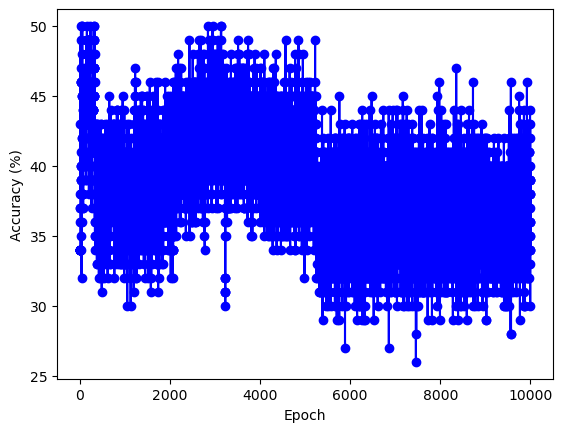

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

W1 = np.random.rand(784, 3)
A = np.zeros((99, 3))

# Hyperparameters
alpha = 0.00001
w_thresh = 20
leak = 0.5
fire_thresh = 10
wu_thresh = 100

ep = 10000

acc_plot = []
for k in range(ep):
    print("Epoch#", k+1)
    
    acc = 0

    for i in range(0,99):
        AA = flattenImage[i]
        A_m = np.dot(AA, W1)

        A[i][0] += A_m[0]
        A[i][1] += A_m[1]
        A[i][2] += A_m[2]

        if A[i][0] > wu_thresh:
            W1[:,0] += alpha * A[i][0]
        else:
            W1[:,0] -= alpha * A[i][0]

        if A[i][1] > wu_thresh:
            W1[:,1] += alpha * A[i][1]
        else:
            W1[:,1] -= alpha * A[i][1]

        if A[i][2] > wu_thresh:
            W1[:,2] += alpha * A[i][2]
        else:
            W1[:,2] -= alpha * A[i][2]

        W1[W1 > w_thresh] = w_thresh
        W1[W1 < 0] = 0

        for j in range(3):
            if A[i][j] >= fire_thresh:
                A[i][:] = 0
            else:
                A[i][j] -= leak

        predict = np.argmax(A[i][:])

        if predict == 0:
            predict = 0
        elif predict == 1:
            predict = 1
        else:
            predict = 5

        if predict == Y_train_filter[i]:
            acc += 1

    
    print(acc)
    acc_plot.append((acc / 100) * 100)

    count_correct = 0
    comp = np.zeros((99, 2))

    for i in range(99):
        comp[i, 0] = Y_train_filter[i]
        comp[i, 1] = predict

        if comp[i, 0] == comp[i, 1]:
            count_correct += 1

    count_correct_store = count_correct
#     print(count_correct_store)

    if acc_plot[k] >= 70:
        comp_s = comp

plt.plot(range(1, ep + 1), acc_plot, "b-o")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

In [17]:
dict_ = {0 : [] , 1 : [] , 5 : []}

def calculateResult(X,weight):
    for i in range(0,99):
        AA = X[i]
        A_m = np.dot(AA, weight)
        predict = np.argmax(A_m)
        
        if dict_[Y_train_filter[i]] is []:
            dict_[Y_train_filter[i]] = [predict]
        else:
            dict_[Y_train_filter[i]].append(predict)
    return dict_
        

In [18]:
res = calculateResult(flattenImage , W1)

In [19]:
np.array(np.unique(res[0], return_counts=True)).T

array([[ 2, 34]])

In [20]:
np.array(np.unique(res[1], return_counts=True)).T

array([[ 1,  2],
       [ 2, 30]])

In [21]:
np.array(np.unique(res[5], return_counts=True)).T

array([[ 2, 33]])

In [22]:
res[5]

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [23]:
W1 = np.random.rand(784, 3)
print(W1)

[[0.92854601 0.26501093 0.94711587]
 [0.90365984 0.8714417  0.66397931]
 [0.07783379 0.50483105 0.95865243]
 ...
 [0.87919704 0.438044   0.43698026]
 [0.09173162 0.57380388 0.40109579]
 [0.75755056 0.06681518 0.50884626]]


In [24]:
len(W1[:,0])

784

46 and 13
46 and 38
46 and 48
46 and 58
46 and 68
46 and 78
46 and 88
46 and 98
46 and 108
46 and 118
46 and 128
46 and 138
46 and 148
46 and 158
46 and 168
46 and 178
46 and 188
46 and 198
46 and 208
46 and 218
46 and 228
46 and 238
46 and 248
46 and 258
46 and 268
46 and 278
46 and 288
46 and 298
46 and 308
46 and 318
46 and 328
46 and 338
46 and 348
46 and 358
46 and 368
46 and 378
46 and 388
46 and 398
46 and 408
46 and 418
46 and 428
46 and 438
46 and 448
46 and 458
46 and 468
46 and 478
46 and 488
46 and 498
46 and 508
46 and 518
46 and 528
46 and 538
46 and 548
46 and 558
46 and 568
46 and 578
46 and 588
46 and 598
46 and 608
46 and 618
46 and 628
46 and 638
46 and 648
46 and 658
46 and 668
46 and 678
46 and 688
46 and 698
46 and 708
46 and 718
46 and 728
46 and 738
46 and 748
46 and 758
46 and 768
46 and 778
46 and 788
46 and 798
46 and 808
46 and 818
46 and 828
46 and 838
46 and 848
46 and 858
46 and 868
46 and 878
46 and 888
46 and 898
46 and 908
46 and 918
46 and 928
46 and 

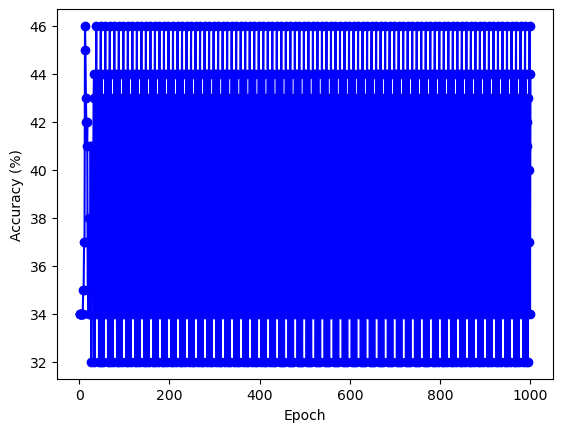

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random

W1 = np.random.rand(784, 3)
A = np.zeros((1, 3))

# Hyperparameters
alpha = 0.00001
w_thresh = 20
leak = 1.5
fire_thresh = 10
wu_thresh = 100

ep = 1000
result = []

acc_plot = []
for k in range(ep):
    #print("Epoch#", k+1)
    
    acc = 0
    maxPredict = []
    for i in range(99):
        AA = flattenImage[i]
        A_m = np.dot(AA, W1)

        A[0][0] += A_m[0]
        A[0][1] += A_m[1]
        A[0][2] += A_m[2]
        #print(A)

        if A[0][0] > wu_thresh:
            W1[:,0] += alpha * A[0][0]
#             W1[:,0] = (for W1 in W1[:,0] if W1 > [W1 > w_thresh] = w_thresh
        else:
            W1[:,0] -= alpha * A[0][0]

        if A[0][1] > wu_thresh:
            W1[:,1] += alpha * A[0][1]
        else:
            W1[:,1] -= alpha * A[0][1]

        if A[0][2] > wu_thresh:
            W1[:,2] += alpha * A[0][2]
        else:
            W1[:,2] -= alpha * A[0][2]

#         W1[:,0][W1 > w_thresh] = w_thresh
#         #W1[W1 < 0] = 0

        for j in range(3):
            if A[0][j] >= fire_thresh:
                A[0][j] = 0
            else:
                A[0][j] -= alpha * leak

        predict = np.argmax(A[0])
        maxPredict.append(predict)
        if predict == 0:
            predict = 0
        elif predict == 1:
            predict = 1
        else:
            predict = 5

        if predict == Y_train_filter[i]:
            acc += 1
    if acc > 45:
        print(f"{acc} and {k+1}")
    acc_plot.append((acc / 100) * 100)
  
    result.append(maxPredict)
    
    
    count_correct = 0
    comp = np.zeros((99, 2))

#     for i in range(99):
#         comp[i, 0] = Y_train_filter[i]
#         comp[i, 1] = predict

#         if comp[i, 0] == comp[i, 1]:
#             count_correct += 1

#     count_correct_store = count_correct
# #     print(count_correct_store)

#     if acc_plot[k] >= 70:
#         comp_s = comp

plt.plot(range(1, ep + 1), acc_plot, "b-o")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

In [26]:
print(len(result))

1000


In [108]:
np.array(np.unique(result[999], return_counts=True)).T

array([[ 0, 14],
       [ 1, 31],
       [ 2, 54]])

In [41]:
print(W1)

[[1.09767956e+41 8.64391863e+40 1.36518851e+41]
 [1.09767956e+41 8.64391863e+40 1.36518851e+41]
 [1.09767956e+41 8.64391863e+40 1.36518851e+41]
 ...
 [1.09767956e+41 8.64391863e+40 1.36518851e+41]
 [1.09767956e+41 8.64391863e+40 1.36518851e+41]
 [1.09767956e+41 8.64391863e+40 1.36518851e+41]]


In [38]:
W1 = np.random.rand(784, 3)
print(W1)

[[0.51775807 0.28838241 0.25357684]
 [0.20753677 0.02301373 0.7971274 ]
 [0.70655977 0.48353976 0.81365737]
 ...
 [0.30503524 0.49669396 0.26634476]
 [0.19215299 0.5475887  0.34567723]
 [0.22533084 0.38642227 0.4858023 ]]


In [39]:
print(W1[:,0])

[0.51775807 0.20753677 0.70655977 0.82677746 0.69715016 0.15853472
 0.30963725 0.84525694 0.4087546  0.76619516 0.92964421 0.19176262
 0.88150172 0.98515276 0.42948165 0.15528001 0.18206488 0.79028868
 0.71772632 0.96270447 0.89403653 0.37781022 0.38800827 0.05610478
 0.02868074 0.83693195 0.05076935 0.00264102 0.83806474 0.83095501
 0.96280751 0.57356308 0.73565886 0.32253147 0.84981372 0.50868208
 0.38674855 0.99185195 0.49905996 0.30215016 0.41538962 0.91772943
 0.44620944 0.73421602 0.40854942 0.46102885 0.78993228 0.5959481
 0.28720856 0.65632263 0.5775461  0.47365811 0.96733853 0.56308685
 0.12582864 0.72095369 0.43700659 0.29045621 0.22825401 0.86321573
 0.88383888 0.22990266 0.92900829 0.18111095 0.90847299 0.58872632
 0.72434904 0.86606266 0.53665764 0.69237543 0.57024734 0.23473381
 0.19433016 0.70094068 0.15340975 0.01432442 0.29176164 0.60898735
 0.91432538 0.09149111 0.85896134 0.38449461 0.82513965 0.69306713
 0.65597854 0.58291876 0.7244436  0.39200374 0.59273708 0.84184